# Introduction to scikit-learn
This book demonstrate some of the most useful functions of scikit-learn lab

I wil learn:
* Scikit-learn workflow
* Getting data ready
* Choose the right estimator/algorithm for our problem
* Evaluating a problem
* Improve a model
* Save and load a trained ,odel
* Put it asll together

## 0.An end to end scikit-learn workflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#1.Getting data ready
heart_diseas = pd.read_csv("../data/heart-disease.csv")
heart_diseas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#create x
X = heart_diseas.drop("target", axis=1)

#create y (labels)
y = heart_diseas["target"]

In [15]:
# 2.Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

#we`ll keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
#3.Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [18]:
clf.fit(X_train, y_train);

In [23]:
#make a prediction
#y_label = clf.predict(np.array([0, 2, 3, 4]));
#giant exception occur

In [20]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
#4.Evaluate a model
y_test

210    0
243    0
198    0
67     1
204    0
      ..
172    0
63     1
189    0
14     1
146    1
Name: target, Length: 61, dtype: int64

In [26]:
clf.score(X_train, y_train)

1.0

In [27]:
clf.score(X_test, y_test)

0.8032786885245902

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        31
           1       0.75      0.90      0.82        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61



In [29]:
confusion_matrix(y_test, y_preds)

array([[22,  9],
       [ 3, 27]], dtype=int64)

In [31]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [35]:
#5. Improve a model
#Try different amount of an estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy of test set : {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy of test set : 72.13%

Trying model with 20 estimators...
Model accuracy of test set : 73.77%

Trying model with 30 estimators...
Model accuracy of test set : 80.33%

Trying model with 40 estimators...
Model accuracy of test set : 78.69%

Trying model with 50 estimators...
Model accuracy of test set : 75.41%

Trying model with 60 estimators...
Model accuracy of test set : 81.97%

Trying model with 70 estimators...
Model accuracy of test set : 80.33%

Trying model with 80 estimators...
Model accuracy of test set : 78.69%

Trying model with 90 estimators...
Model accuracy of test set : 73.77%



In [37]:
ans = 0
for i in range(10, 100):
    ans += 1
print(ans)

90


In [38]:
#6. Save a model
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [41]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7377049180327869

## Getting our data ready to be used in Machine Learning

three main things we have to do:
* Split the data into features and labels (usually X and y)
* Fitting(imputing) or disregarding missing values
* Converting non-numerical values to numerical

In [3]:
heart_diseas.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_diseas.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y = heart_diseas["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# Split a data into a training and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [15]:
X.shape[0] * 0.8

242.4

In [14]:
len(heart_diseas)

303

### 1.1 Make sure it`s all numerical

In [42]:
car_sales = pd.read_csv("../data/car-sales-extended-missing-data.csv")

In [43]:
car_sales = car_sales.dropna()
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [45]:
# car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].astype(int)
# car_sales["Doors"] = car_sales["Doors"].astype(int)
# car_sales["Price"] = car_sales["Price"].astype(int)
len(car_sales.dropna())

773

In [46]:
len(car_sales)

773

In [47]:
# Split to X y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [49]:
car_sales["Doors"].value_counts()

4.0    659
5.0     61
3.0     53
Name: Doors, dtype: int64

In [50]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [51]:
# Turn the catogories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [52]:
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [54]:
#another way of doing the same but with pd
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
994,3.0,1,0,0,0,0,1,0,0,0
995,4.0,0,0,0,1,1,0,0,0,0
997,4.0,0,0,1,0,0,1,0,0,0
998,4.0,0,1,0,0,0,0,0,0,1


In [55]:
# Let us refit a model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                   y,
                                                   test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [56]:
model.score(X_test, y_test)

0.35930666172697523

C:\Users\User\AppData\Local\Temp\ipykernel_13520\777602419.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  car_gruoped = car_sales.groupby("Make").mean()


<BarContainer object of 4 artists>

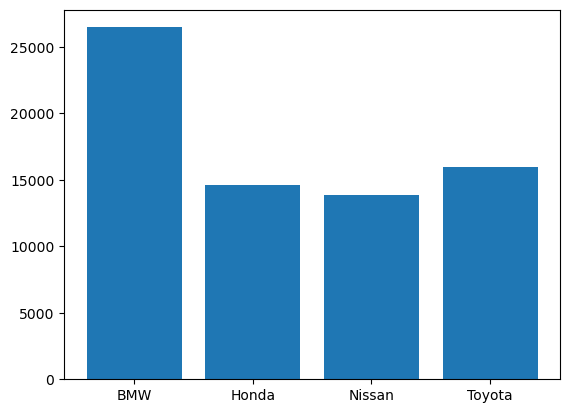

In [64]:
car_gruoped = car_sales.groupby("Make").mean()
plt.bar(car_gruoped.index, car_gruoped["Price"])


In [69]:
import sklearn as sklearn
print(sklearn.__version__)

1.2.2


# 1.2 Now let`s do it without deleting NaN rows

What to do with missing values?:
* Fill the mwith some value(imputation)
* Remove the samples with missung data all together

In [71]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [75]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [77]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [78]:
# Let us try convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

The code above works but it contains missing values so ignore it